### Kmeans & GMM:

At this question, we tend to implement Kmeans & GMM algorithms. For this purpose, `DO NOT EMPLOY` ready-for-use python libraries. Use this implementation for solving the following questions. Kmeans should continue till centeroids won't change. Furthermore, GMM also should continue till the difference of two consecutive likelihood logarithm would be less than 0.1. Notice that after executing the Kmeans part, the primitive centroids of GMM should be identical with ultimate Kmeans centroids.

In [ ]:
from sklearn.datasets.samples_generator import make_classification, make_moons, make_circles

#### Part 1:

Utilize the subsequent cell in order to create the Dataset. Afterwards, try to execute the algorithm with k=2 centroids. At Kmeans, it is recommended to execute the algorithm with several various starting states in order to eventually choose the best respective result.

In [ ]:
X, Y = make_classification(n_samples=700, n_features=10, n_informative=5,
                          n_redundant=0, n_clusters_per_class=2, n_classes=3)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange

# Define Kmeans class 

class Kmeans:
    
    def __init__(self, k=2, max_iterations=1000):
        self.k = k
        self.max_iterations = max_iterations
    
    def euclidean_distance(self, point1, point2):
        return np.linalg.norm(point1-point2, axis=0)
        
    def fit(self, data):
        # initial centroids
        self.centroids = {}
        m = np.shape(data)[0]
        for i in range(self.k):
            r = randrange(m)
            self.centroids[i] = data[r]
        #start K-Mean clustering
        for i in range(self.max_iterations):
            #create classifications the size of K
            self.classes = {}
            for j in range(self.k):
                self.classes[j] = []
            #find the distance between the points and the centroids
            for point in data:
                distances = []
                for index in self.centroids:
                    distances.append(self.euclidean_distance(point,self.centroids[index]))
                #find which cluster the datapoint belongs to by finding the minimum
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)
            #now that we have classified the datapoints into clusters, we need to again 
            #find new centroid by taking the centroid of the points in the cluster class
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis = 0)

    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [ ]:
k_means = Kmeans(2)
k_means.fit(X)

In [ ]:
centroids = list(k_means.centroids.values())
centroids = np.array(centroids)
print(centroids)

[[ 8.64244139e-02  9.44030436e-01  3.26625623e-01 -1.96527225e-02
  -2.26953643e-04  6.15502979e-02  4.91703800e-02 -4.08432392e-01
  -6.06558936e-01  1.26321808e+00]
 [-8.14945567e-02 -1.01074446e+00 -1.04897043e+00  3.61466200e-02
  -8.15529850e-02 -4.41312063e-02 -9.59976198e-02 -4.51085109e-01
   1.45644687e+00 -6.42578986e-01]]


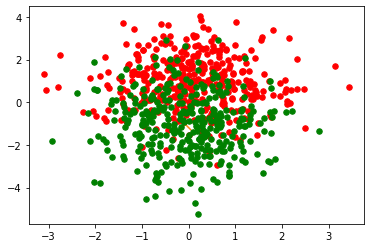

In [ ]:
colors = 10*["r", "g"]

for centroid in k_means.centroids:
    plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s = 130, marker = "x")

for cluster_index in k_means.classes:
    color = colors[cluster_index]
    for features in k_means.classes[cluster_index]:
        plt.scatter(features[0], features[1], color = color,s = 30)

In [ ]:
# GMM Implementation

import numpy as np
import scipy.stats as sp

class GMM():
    def __init__(self, X, k=2):
        X = np.asarray(X)
        self.m, self.n = X.shape
        self.data = X.copy()
        self.k = k
        self.sigma_arr = np.array([np.asmatrix(np.identity(self.n)) for i in range(self.k)])
        self.phi = np.ones(self.k)/self.k
        self.Z = np.asmatrix(np.empty((self.m, self.k), dtype=float))

    def initialize_means(self,means):
        self.mean_arr = means

    def fit(self, tol=0.1):
        num_iters = 0
        logl = 1
        previous_logl = 0
        while(logl-previous_logl > tol):
            previous_logl = self.loglikelihood()
            self.e_step()
            self.m_step()
            num_iters += 1
            logl = self.loglikelihood()
            print('Itr %d: log-likelihood = %.6f'%(num_iters, logl))
        print('Terminate at %d-th itr:log-likelihood = %.6f'%(num_iters, logl))

    def loglikelihood(self):
        logl = 0
        for i in range(self.m):
            tmp = 0
            for j in range(self.k):
                tmp += sp.multivariate_normal.pdf(self.data[i, :],self.mean_arr[j, :].A1,self.sigma_arr[j, :]) * self.phi[j]
            logl += np.log(tmp)
        return logl

    def e_step(self):
        for i in range(self.m):
            den = 0
            for j in range(self.k):
                num = sp.multivariate_normal.pdf(self.data[i, :],
                                                       self.mean_arr[j].A1,
                                                       self.sigma_arr[j]) *\
                      self.phi[j]                     
                den += num
                self.Z[i, j] = num
            self.Z[i, :] /= den
            assert self.Z[i, :].sum() - 1 < 1e-4 

    def m_step(self):
         for j in range(self.k):
            const = self.Z[:, j].sum()
            self.phi[j] = 1/self.m * const
            _mu_j = np.zeros(self.n)
            _sigma_j = np.zeros((self.n, self.n))
            for i in range(self.m):
                _mu_j += (self.data[i, :] * self.Z[i, j])
                _sigma_j += self.Z[i, j] * ((self.data[i, :] - self.mean_arr[j, :]).T * (self.data[i, :] - self.mean_arr[j, :]))
            self.mean_arr[j] = _mu_j / const
            self.sigma_arr[j] = _sigma_j / const
    
    def predict(self):
        return np.array(np.argmax(gmm.Z,axis=1)).flatten()

In [ ]:
gmm = GMM(X,k=2)
gmm.initialize_means(np.asmatrix(centroids))
gmm.fit()

Itr 1: log-likelihood = -11191.203380
Itr 2: log-likelihood = -11131.177975
Itr 3: log-likelihood = -11101.514769
Itr 4: log-likelihood = -11091.658867
Itr 5: log-likelihood = -11086.676222
Itr 6: log-likelihood = -11083.274866
Itr 7: log-likelihood = -11080.953826
Itr 8: log-likelihood = -11079.316011
Itr 9: log-likelihood = -11078.147034
Itr 10: log-likelihood = -11077.267133
Itr 11: log-likelihood = -11076.563206
Itr 12: log-likelihood = -11075.954410
Itr 13: log-likelihood = -11075.391099
Itr 14: log-likelihood = -11074.842963
Itr 15: log-likelihood = -11074.288220
Itr 16: log-likelihood = -11073.737114
Itr 17: log-likelihood = -11073.241949
Itr 18: log-likelihood = -11072.833806
Itr 19: log-likelihood = -11072.493902
Itr 20: log-likelihood = -11072.188276
Itr 21: log-likelihood = -11071.889279
Itr 22: log-likelihood = -11071.582261
Itr 23: log-likelihood = -11071.268502
Itr 24: log-likelihood = -11070.960226
Itr 25: log-likelihood = -11070.670422
Itr 26: log-likelihood = -11070.40

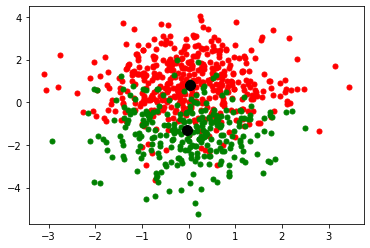

In [ ]:
k = 2
data = pd.DataFrame(X)
data['Predicted'] = gmm.predict()
for i in range(k):
    plt.scatter(data[data['Predicted']==i][0], data[data['Predicted']==i][1]
                ,s=25, marker="o", label = "cluster "+str(i), color =colors[i])

plt.scatter(np.array(gmm.mean_arr[:,0]).flatten() , np.array(gmm.mean_arr[:,1]).flatten() , s = 100, color = 'k')
plt.show();

#### Part 2:

In a separated cell, implement `Purity` and `Rand-Index` criteria in order to compare the performance of mentioned algorithms.

In [ ]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    return np.sum(y_pred==y_true)/len(y_true) 

In [ ]:
from scipy.special import comb
def rand_index_score(clusters, classes):
    tp_plus_fp = comb(np.bincount(clusters), 2).sum()
    tp_plus_fn = comb(np.bincount(classes), 2).sum()
    A = np.c_[(clusters, classes)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(clusters))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [ ]:
# Kmeans
k_means_preds = []
for i in X:
    k_means_preds.append(k_means.predict(i))

print('Purity Of kmeans: ', purity_score(Y, k_means_preds))
print('rand index of kmeans', rand_index_score(k_means_preds, Y))

Purity Of kmeans:  0.3057142857142857
rand index of kmeans 0.5076640098099325


#### Part 3:

Use the following cell in order to create new Datasets. Afterwards, try to execute mentioned algorithms on new Dataset and eventually compare the recent results with the help of visualization(there is no problem for using relevant python libraries like `matplotlib`). Consider two clusters for this part.

In [ ]:
X, Y = make_classification(n_samples=700, n_features=2, n_informative=2, n_redundant=0, n_classes=2)

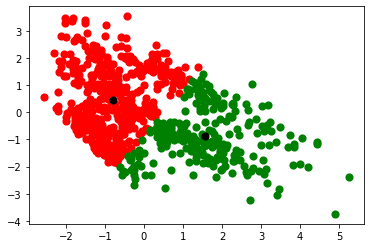

In [ ]:
# K_Means

colors = ["r", "g"]
kmeans = Kmeans()
kmeans.fit(X)
kmeans_preds = kmeans.predict(X)
preds_df=pd.DataFrame(X)
preds_df['Predicted'] = kmeans_preds
for classification in kmeans.classes:
    color = colors[classification]
    for featureset in kmeans.classes[classification]:
        plt.scatter(featureset[0], featureset[1], marker="o", color=color, s=10, linewidths=5)
for centroid in kmeans.centroids:
    plt.scatter(kmeans.centroids[centroid][0], kmeans.centroids[centroid][1],
                marker="o", color="k", s=10, linewidths=5)
plt.show()

Itr 1: log-likelihood = -2324.893457
Itr 2: log-likelihood = -2318.072790
Itr 3: log-likelihood = -2313.226678
Itr 4: log-likelihood = -2308.557712
Itr 5: log-likelihood = -2303.770915
Itr 6: log-likelihood = -2298.996910
Itr 7: log-likelihood = -2294.567975
Itr 8: log-likelihood = -2290.829517
Itr 9: log-likelihood = -2287.949872
Itr 10: log-likelihood = -2285.858912
Itr 11: log-likelihood = -2284.349606
Itr 12: log-likelihood = -2283.213895
Itr 13: log-likelihood = -2282.306615
Itr 14: log-likelihood = -2281.543926
Itr 15: log-likelihood = -2280.881188
Itr 16: log-likelihood = -2280.294512
Itr 17: log-likelihood = -2279.770069
Itr 18: log-likelihood = -2279.298799
Itr 19: log-likelihood = -2278.873969
Itr 20: log-likelihood = -2278.490078
Itr 21: log-likelihood = -2278.142377
Itr 22: log-likelihood = -2277.826651
Itr 23: log-likelihood = -2277.539119
Itr 24: log-likelihood = -2277.276383
Itr 25: log-likelihood = -2277.035401
Itr 26: log-likelihood = -2276.813463
Itr 27: log-likelihoo

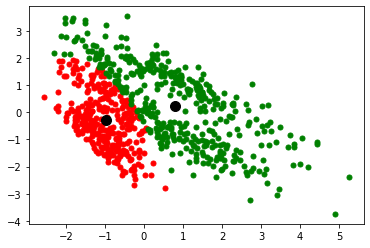

In [ ]:
# GMM

k = 2
gmm = GMM(X,k)
centroids = list(kmeans.centroids.values())
centroids = np.array(centroids)
gmm.initialize_means(np.asmatrix(centroids))
gmm.fit();
data = pd.DataFrame(X)
data['Predicted'] = gmm.predict()
for i in range(k):
    plt.scatter(data[data['Predicted']==i][0], data[data['Predicted']==i][1]
                ,s=25, marker="o", label = "cluster "+str(i), color =colors[i])
plt.scatter(np.array(gmm.mean_arr[:,0]).flatten() , np.array(gmm.mean_arr[:,1]).flatten() , s = 100, color = 'k')
plt.show();

In [ ]:
X, Y = make_moons(n_samples=700, noise=0.2)

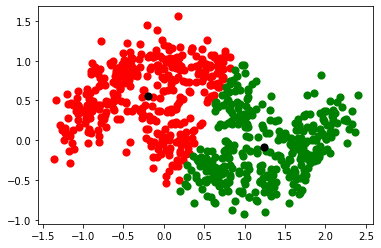

In [ ]:
# K_Means

colors = ["r", "g"]
kmeans = Kmeans()
kmeans.fit(X)
kmeans_preds = kmeans.predict(X)
preds_df=pd.DataFrame(X)
preds_df['Predicted'] = kmeans_preds
for classification in kmeans.classes:
    color = colors[classification]
    for featureset in kmeans.classes[classification]:
        plt.scatter(featureset[0], featureset[1], marker="o", color=color, s=10, linewidths=5)
for centroid in kmeans.centroids:
    plt.scatter(kmeans.centroids[centroid][0], kmeans.centroids[centroid][1],
                marker="o", color="k", s=10, linewidths=5)
plt.show()

Itr 1: log-likelihood = -1386.416791
Itr 2: log-likelihood = -1381.341200
Itr 3: log-likelihood = -1375.833500
Itr 4: log-likelihood = -1366.715043
Itr 5: log-likelihood = -1352.211286
Itr 6: log-likelihood = -1332.223751
Itr 7: log-likelihood = -1312.168504
Itr 8: log-likelihood = -1300.207505
Itr 9: log-likelihood = -1296.310432
Itr 10: log-likelihood = -1295.489253
Itr 11: log-likelihood = -1295.339646
Itr 12: log-likelihood = -1295.310495
Terminate at 12-th itr:log-likelihood = -1295.310495


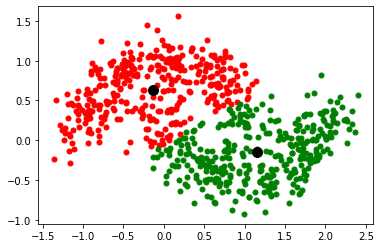

In [ ]:
# GMM

k = 2
gmm = GMM(X,k)
centroids = list(kmeans.centroids.values())
centroids = np.array(centroids)
gmm.initialize_means(np.asmatrix(centroids))
gmm.fit();
data = pd.DataFrame(X)
data['Predicted'] = gmm.predict()
for i in range(k):
    plt.scatter(data[data['Predicted']==i][0], data[data['Predicted']==i][1]
                ,s=25, marker="o", label = "cluster "+str(i), color =colors[i])
plt.scatter(np.array(gmm.mean_arr[:,0]).flatten() , np.array(gmm.mean_arr[:,1]).flatten() , s = 100, color = 'k')
plt.show();

In [ ]:
X, Y = make_circles(n_samples=700, noise=0.2)

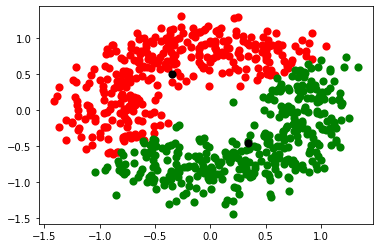

In [ ]:
# K_Means

colors = ["r", "g"]
kmeans = Kmeans()
kmeans.fit(X)
kmeans_preds = kmeans.predict(X)
preds_df=pd.DataFrame(X)
preds_df['Predicted'] = kmeans_preds
for classification in kmeans.classes:
    color = colors[classification]
    for featureset in kmeans.classes[classification]:
        plt.scatter(featureset[0], featureset[1], marker="o", color=color, s=10, linewidths=5)
for centroid in kmeans.centroids:
    plt.scatter(kmeans.centroids[centroid][0], kmeans.centroids[centroid][1],
                marker="o", color="k", s=10, linewidths=5)
plt.show()

Itr 1: log-likelihood = -1424.346346
Itr 2: log-likelihood = -1414.832508
Itr 3: log-likelihood = -1414.726704
Itr 4: log-likelihood = -1414.600786
Itr 5: log-likelihood = -1414.443442
Itr 6: log-likelihood = -1414.243286
Itr 7: log-likelihood = -1413.984025
Itr 8: log-likelihood = -1413.641459
Itr 9: log-likelihood = -1413.178597
Itr 10: log-likelihood = -1412.537266
Itr 11: log-likelihood = -1411.623278
Itr 12: log-likelihood = -1410.279741
Itr 13: log-likelihood = -1408.239046
Itr 14: log-likelihood = -1405.040306
Itr 15: log-likelihood = -1399.910346
Itr 16: log-likelihood = -1391.700995
Itr 17: log-likelihood = -1379.338013
Itr 18: log-likelihood = -1363.746178
Itr 19: log-likelihood = -1350.050340
Itr 20: log-likelihood = -1343.079965
Itr 21: log-likelihood = -1341.001162
Itr 22: log-likelihood = -1340.420529
Itr 23: log-likelihood = -1340.129500
Itr 24: log-likelihood = -1339.908710
Itr 25: log-likelihood = -1339.725887
Itr 26: log-likelihood = -1339.573605
Itr 27: log-likelihoo

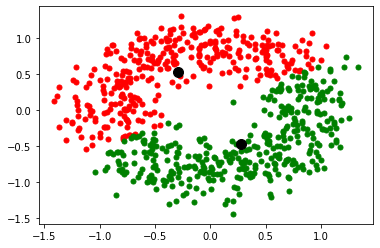

In [ ]:
# GMM

k = 2
gmm = GMM(X,k)
centroids = list(kmeans.centroids.values())
centroids = np.array(centroids)
gmm.initialize_means(np.asmatrix(centroids))
gmm.fit();
data = pd.DataFrame(X)
data['Predicted'] = gmm.predict()
for i in range(k):
    plt.scatter(data[data['Predicted']==i][0], data[data['Predicted']==i][1]
                ,s=25, marker="o", label = "cluster "+str(i), color =colors[i])
plt.scatter(np.array(gmm.mean_arr[:,0]).flatten() , np.array(gmm.mean_arr[:,1]).flatten() , s = 100, color = 'k')
plt.show();